# Name: Ddhruv Arora

## Task 1 : Prediction Using Supervised ML

### Task is to predict the percentage of a student based on the no. of study hours.

# GRIPJULY21



In [1]:
# importing necessary libraries
import pandas as pd              # pandas for reading data
import matplotlib.pyplot as plt  # matplotlib for visulization of data 

import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [2]:
data_url = "http://bit.ly/w-data" # dataset url 
df = pd.read_csv(data_url)        # reading dataset from given url
df.head()                         # displaying some data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Visualization of Data and Understanding it

In [3]:
# getting the shape of data
sh = df.shape
print(f"No. of rows    : {sh[0]}")
print(f"No. of columns : {sh[1]}")

No. of rows    : 25
No. of columns : 2


In [4]:
# getting stastical information of data 
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# checking for info like dataset size, null values, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<Figure size 720x432 with 0 Axes>

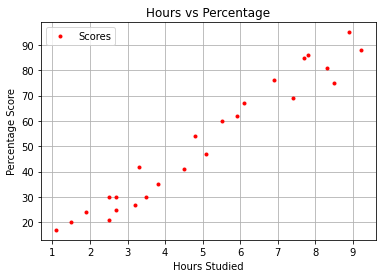

In [6]:
# Analyzing the scores by plotting the distribution
plt.figure(figsize=(10, 6))                          # setting the figure size.
df.plot(x='Hours', y='Scores', style='.', color='r') # plotting hours vs percentage.
plt.title('Hours vs Percentage')                     # setting the title.
plt.xlabel('Hours Studied')                          # setting the x label of graph.
plt.ylabel('Percentage Score')                       # setting the y label of graph.
plt.grid()                                           # used to add grid lines.
plt.show()                                           # used to display the graph.

### From the graph above, we can see that there is a positive linear relation between the number of hours studied and percentage of score.
##### That menas on increasing the number of hours will increase the percentage obtained. 

# Preparing the data

In [7]:
# setting up the features and labels.
X = df[["Hours"]] # Independent Variable, input var.
y = df["Scores"]  # Dependent Variable, target var.

In [8]:
# Splitting the data into Training and Testing datasets.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data splitted Successfully!!!")

Data splitted Successfully!!!


# Implementing Linear Regression Model

In [9]:
from sklearn.linear_model import LinearRegression # importing Linear Regression Class.
model = LinearRegression()                        # Creating instance of Linear Regression model.
model.fit(X_train, y_train)                       # training data using train dataset.
print("Model Trained Successfully !!!")

Model Trained Successfully !!!


In [10]:
# getting the score of model, to see how good it is working on testing dataset
score = round((model.score(X_test, y_test) * 100), 2)
print(f"Score of model : {score} %")

Score of model : 96.78 %


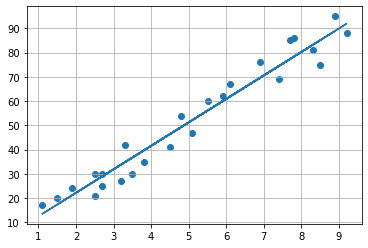

In [11]:
# Plotting the regression line
line = model.coef_ * X + model.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.grid()
plt.show()

# Making Predictions

In [12]:
# pedicting the scores for x from test dataset.
y_pred = model.predict(X_test)
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [13]:
# creating a dataframe to compare the scores i.e actual vs predicted.
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df2

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


In [14]:
# predicting score from given datapint i.e 9.25 hours.
hours = [[9.25]]
user_data_pred = model.predict(hours)
print(f"No. of Hours Studied : {hours[0][0]}")
print(f"Predicted Score      : {round(user_data_pred[0], 2)}%")

No. of Hours Studied : 9.25
Predicted Score      : 92.39%


# Evaluating the model

In [15]:
from sklearn import metrics  
print('Mean Absolute Error :', round(metrics.mean_absolute_error(y_test, y_pred), 2)) 

Mean Absolute Error : 3.92


# Conclusion
### From above we can conclude that if student studies for <i> 9.25 hrs </i> , then possibly he or she will get a score of <i> 92.39% </i> 

# Thank you 